In [132]:
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from scipy import stats as st

In [133]:
df=pd.read_csv("user_behavior_dataset.csv")
df.head()
df.shape

(700, 11)

In [134]:
df.isnull()

User ID  Device Model  Operating System  App Usage Time (min/day)  \
0      False         False             False                     False   
1      False          True             False                     False   
2      False         False             False                     False   
3      False         False             False                     False   
4      False         False              True                     False   
..       ...           ...               ...                       ...   
695    False         False             False                     False   
696    False         False             False                     False   
697    False         False             False                     False   
698    False         False             False                     False   
699    False         False             False                     False   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   
..                          ...                      ...   
695                       False                    False   
696                       False                    False   
697                       False                    False   
698                       False                    False   
699                       False                    False   

     Number of Apps Installed  Data Usage (MB/day)    Age  Gender  \
0                       False                False  False   False   
1                       False                False  False   False   
2                       False                False  False    True   
3                       False                False  False   False   
4                       False                False  False   False   
..                        ...                  ...    ...     ...   
695                     False                False  False   False   
696                     False                False  False   False   
697                     False                False  False   False   
698                     False                False  False   False   
699                     False                False  False   False   

     User Behavior Class  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
..                   ...  
695                False  
696                False  
697                False  
698                False  
699                False  

[700 rows x 11 columns]

In [135]:
df.isnull().sum()

User ID                       0
Device Model                  1
Operating System              1
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        1
User Behavior Class           0
dtype: int64

In [136]:

df['Operating System'].fillna('Not mentioned' ,inplace=True)
df['Gender'].fillna('unrecognisable',inplace=True)
df['Device Model'].fillna('Not Mentioned',inplace=True)
df.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_14076\2757481041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Operating System'].fillna('Not mentioned' ,inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_14076\2757481041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2   Not Mentioned          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12    Not mentioned                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age          Gender  \
0                        67                 1122   40            Male   
1                        42                  944   47          Female   
2                        32                  322   42  unrecognisable   
3                        56                  871   20            Male   
4                        58                  988   31          Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [138]:
df['App Usage Time (min/day)'].value_counts()

App Usage Time (min/day)
64     7
46     5
225    5
138    5
516    5
      ..
538    1
63     1
178    1
316    1
154    1
Name: count, Length: 387, dtype: int64

In [139]:

df= df.dropna()
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2   Not Mentioned          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12    Not mentioned                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age          Gender  \
0                        67                 1122   40            Male   
1                        42                  944   47          Female   
2                        32                  322   42  unrecognisable   
3                        56                  871   20            Male   
4                        58                  988   31          Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [140]:
df.describe()

User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min                 302.000000                 10.000000           102.000000   
25%                 722.250000                 26.000000           373.000000   
50%                1502.500000                 49.000000           823.500000   
75%                2229.500000                 74.000000          1341.000000   
max                2993.000000                 99.000000          2497.000000   

              Age  User Behavior Class  
count  700.000000           700.000000  
mean    38.482857             2.990000  
std     12.012916             1.401476  
min     18.000000             1.000000  
25%     28.000000             2.000000  
50%     38.000000             3.000000  
75%     49.000000             4.000000  
max     59.000000             5.000000

<Axes: xlabel='Age', ylabel='Density'>

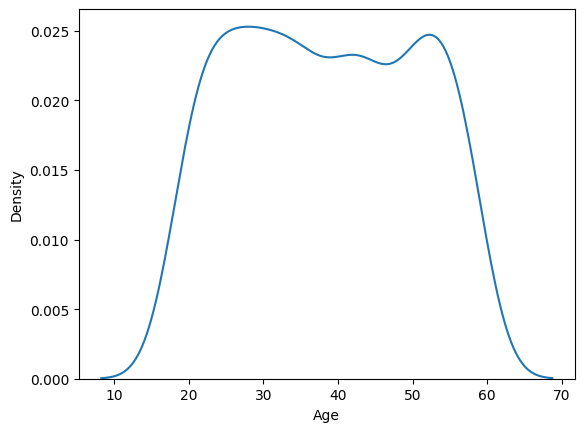

In [141]:
sns.kdeplot(df['Age'])

In [142]:
df['Age'].skew()

np.float64(0.027974303216233527)

In [143]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)
        

print(f'numeric columns are {num}')
print(f'categorical columns are {cat}')

numeric columns are ['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
categorical columns are ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']


<Axes: ylabel='Screen On Time (hours/day)'>

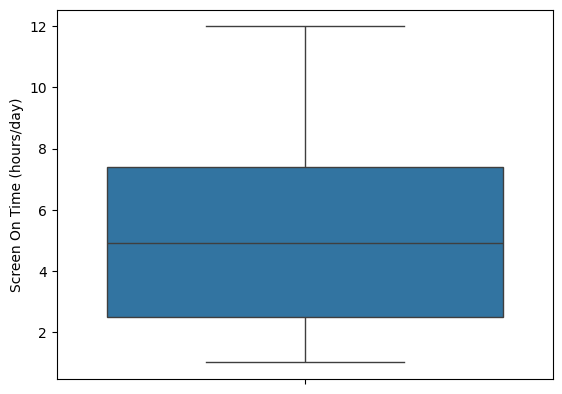

In [144]:
# UNIVARIATE ANALYSIS

# Numerical

sns.boxplot(df['Screen On Time (hours/day)'])

Text(0.5, 1.0, 'Screen On Time (hours/day)')

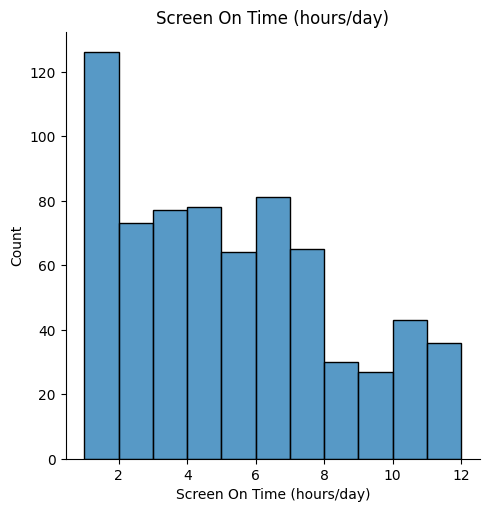

In [145]:
sns.displot(df['Screen On Time (hours/day)'])
plt.title('Screen On Time (hours/day)')

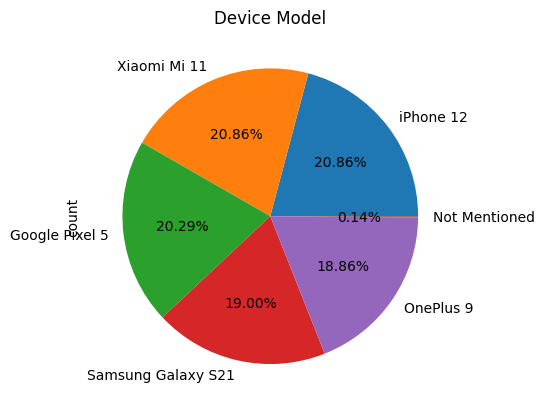

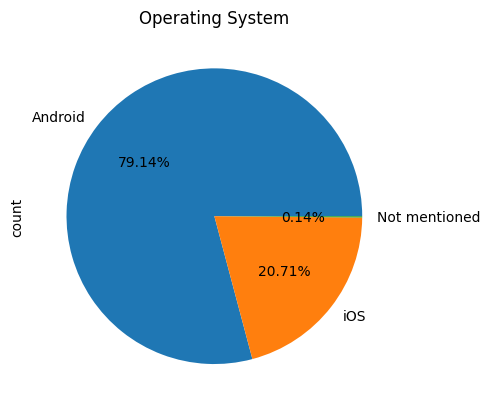

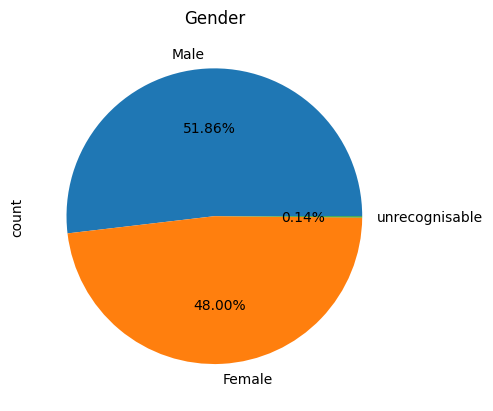

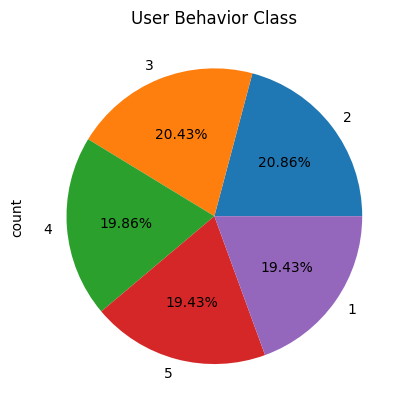

In [146]:
# CATEGORICAL

for i in cat:
    df[i].value_counts().plot(kind="pie",autopct="%1.2f%%")
    plt.title(i)
    plt.show()
    
    

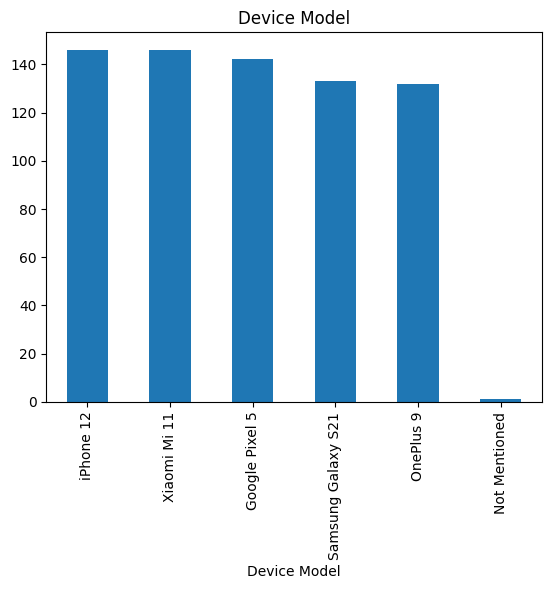

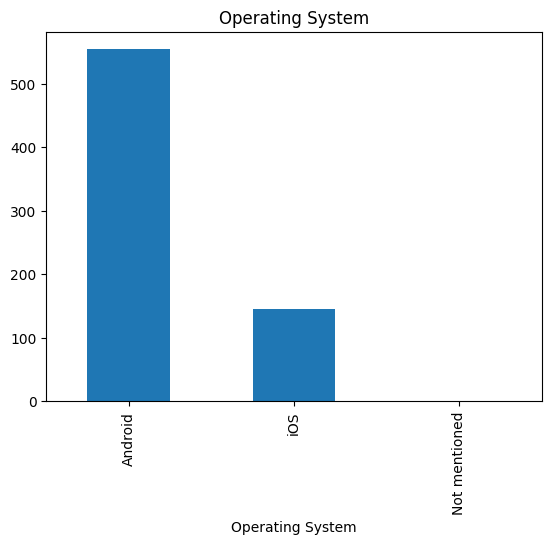

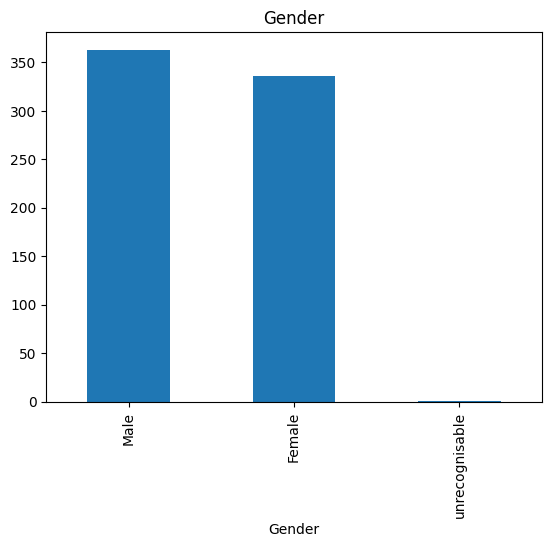

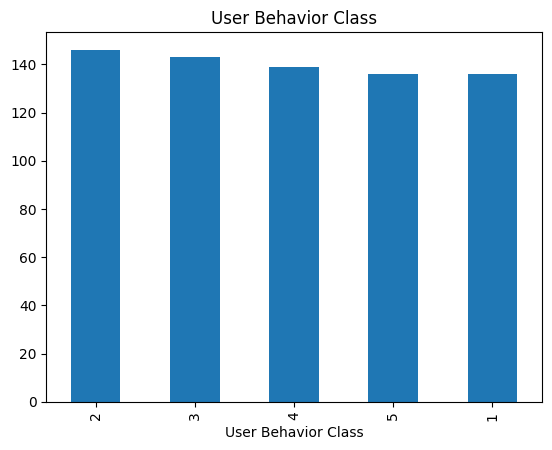

In [147]:
for i in cat:
    df[i].value_counts().plot(kind="bar")
    plt.title(i)
    plt.show()

# BIVARIATE ANALYSIS

# numerical numerical

In [148]:
num


['User ID',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

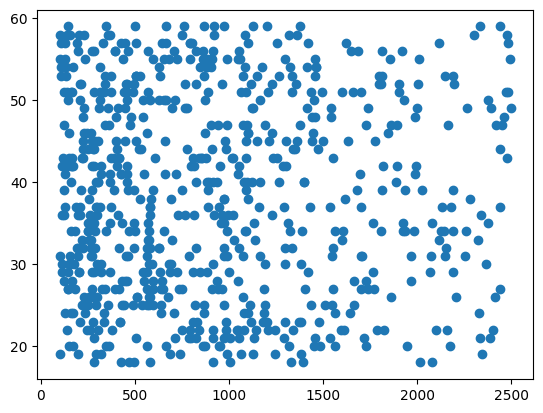

In [149]:
plt.scatter(df['Data Usage (MB/day)'],df['Age'])

-0.002722411868857364


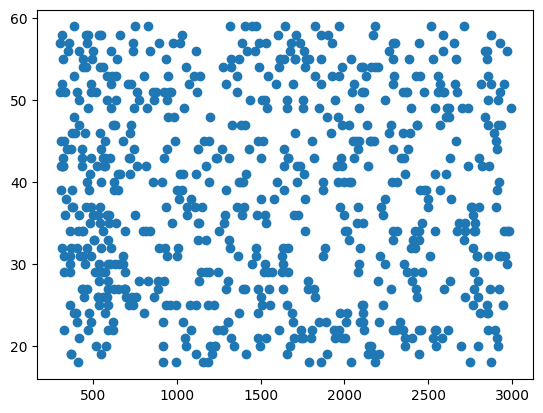

In [150]:
print(np.corrcoef(df['Battery Drain (mAh/day)'],df['Age'])[0,1])
plt.scatter(df['Battery Drain (mAh/day)'],df['Age'])

<Axes: xlabel='Device Model', ylabel='App Usage Time (min/day)'>

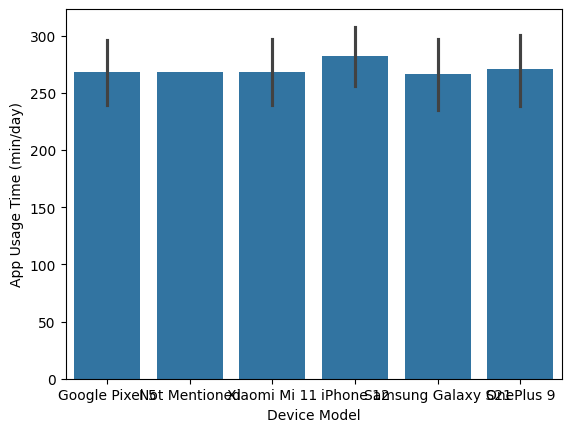

In [151]:
# categorical numerical
sns.barplot(data=df,x='Device Model',y='App Usage Time (min/day)')

<Axes: xlabel='Device Model', ylabel='App Usage Time (min/day)'>

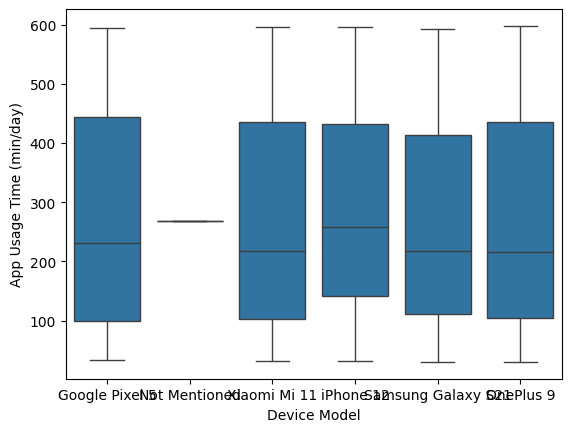

In [152]:
sns.boxplot(data=df, x='Device Model', y='App Usage Time (min/day)')

C:\Users\ayush\AppData\Local\Temp\ipykernel_14076\4284771865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Device Model',y='App Usage Time (min/day)',data=df ,palette='rainbow')


<Axes: xlabel='Device Model', ylabel='App Usage Time (min/day)'>

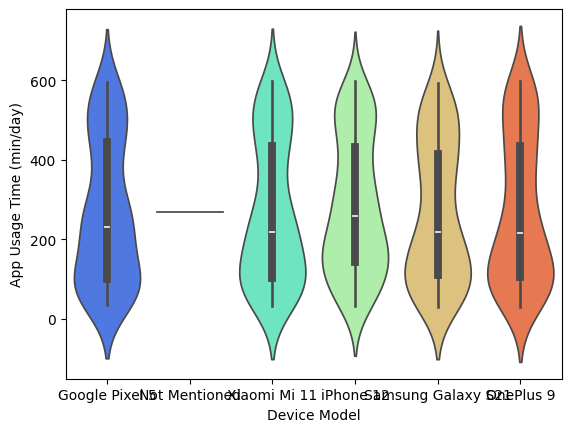

In [153]:
sns.violinplot(x='Device Model',y='App Usage Time (min/day)',data=df ,palette='rainbow')

In [154]:
# categorical categorical

pd.crosstab(df['Device Model'],df['Operating System'])

Operating System    Android  Not mentioned  iOS
Device Model                                   
Google Pixel 5          142              0    0
Not Mentioned             1              0    0
OnePlus 9               132              0    0
Samsung Galaxy S21      133              0    0
Xiaomi Mi 11            146              0    0
iPhone 12                 0              1  145

<Axes: xlabel='Operating System', ylabel='Device Model'>

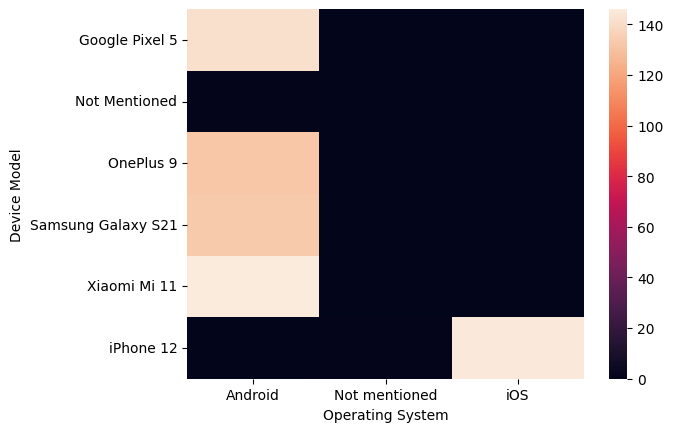

In [155]:
sns.heatmap(pd.crosstab(df['Device Model'],df['Operating System']))

In [157]:
# Option 1: Z-Score

z = np.abs(scipy.stats.zscore(df['App Usage Time (min/day)']))
print(z)

#dropping outliers
df = df[(z < 3)]

0      0.688256
1      0.017668
2      0.661471
3      0.181443
4      0.475107
         ...   
695    1.011609
696    0.253407
697    0.972078
698    1.181031
699    0.333922
Name: App Usage Time (min/day), Length: 700, dtype: float64


In [158]:
# Detect duplicate rows
duplicates = df.duplicated()
print("\nDuplicate rows:")
print(duplicates)

# Remove duplicate rows
# You can use the drop_duplicates() method to remove duplicate rows from a DataFrame.
df_no_duplicates = df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicate rows:")
print(df_no_duplicates)

# Detect duplicate columns
duplicate_columns = df.T.duplicated()
print("\nDuplicate columns:")
print(duplicate_columns)

# Remove duplicate columns
df_no_duplicate_columns = df.T.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicate columns:")
print(df_no_duplicate_columns)


Duplicate rows:
0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

DataFrame after removing duplicate rows:
None

Duplicate columns:
User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

DataFrame after removing duplicate columns:
None


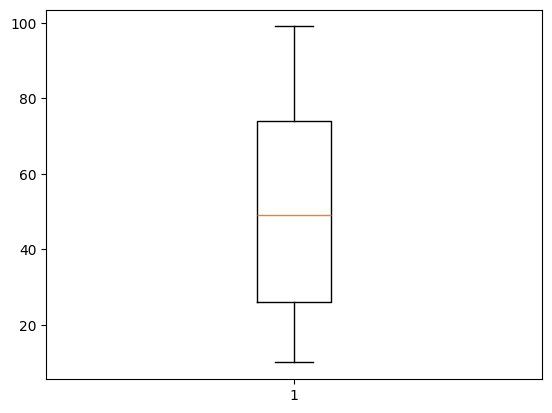

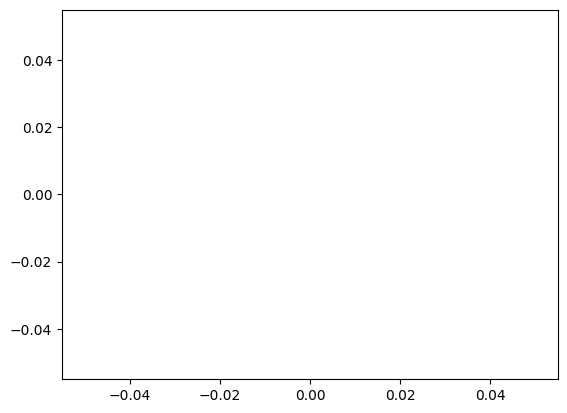

In [160]:
# Check for outliers
# Calculate the IQR for a specific column in the dataset
column_name = 'Number of Apps Installed'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [164]:
# chi 2 test caegorical and categorical

contigency= pd.crosstab(df['Device Model'], df['Operating System']) 
contigency

Operating System    Android  Not mentioned  iOS
Device Model                                   
Google Pixel 5          142              0    0
Not Mentioned             1              0    0
OnePlus 9               132              0    0
Samsung Galaxy S21      133              0    0
Xiaomi Mi 11            146              0    0
iPhone 12                 0              1  145

In [165]:
c, p, dof, expected = chi2_contingency(contigency) 
print(p)

6.280146699235733e-144


In [166]:
# t-test - Categorical and Numerical  'Acceleration'
tr=df.dropna(axis=0,how='any')
tr.describe()
a = tr[tr['User Behavior Class'] >3]['Battery Drain (mAh/day)']
b = tr[tr['User Behavior Class'] <=3 ]['Battery Drain (mAh/day)']
t,p =st.ttest_ind(a,b)
print(f't-statistic: {t}, p-value: {p}')

t-statistic: 44.50086260366865, p-value: 5.325506529964821e-206


In [167]:
# ANOVA - Categorical and Numerical
fvalue, pvalue = st.f_oneway(a,b)
print(fvalue, pvalue)

1980.3267724705931 5.325506529966168e-206


In [168]:
# Linear - Numerical and Numerical
x = tr['App Usage Time (min/day)'].to_numpy()
y = tr['Screen On Time (hours/day)'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.95033304],
       [0.95033304, 1.        ]])

In [172]:
#Z-score normalization
from sklearn.preprocessing import StandardScaler

# Drop missing values for simplicity
df.dropna(subset=['Data Usage (MB/day)'], inplace=True)

# Z-score normalization of the 'PAS' column
scaler = StandardScaler()
df['Data Usage (MB/day)_zscore'] = scaler.fit_transform(df[['Data Usage (MB/day)']])

# Display the first few rows
print(df[['Data Usage (MB/day)', 'Data Usage (MB/day)_zscore']].head())

   Data Usage (MB/day)  Data Usage (MB/day)_zscore
0                 1122                    0.300405
1                  944                    0.022277
2                  322                   -0.949607
3                  871                   -0.091787
4                  988                    0.091028


In [173]:
# decimal scaling normalization

# Find the maximum absolute value in the PAS column
max_val = np.max(np.abs(df['App Usage Time (min/day)']))

# Calculate j (the smallest integer such that max(|x'|) < 1)
j = np.ceil(np.log10(max_val))

# Apply decimal scaling normalization
df['App Usage Time (min/day)_scaled'] = df['App Usage Time (min/day)'] / (10**j)

# Display the first few rows
print(df[['App Usage Time (min/day)', 'App Usage Time (min/day)_scaled']].head())

   App Usage Time (min/day)  App Usage Time (min/day)_scaled
0                       393                            0.393
1                       268                            0.268
2                       154                            0.154
3                       239                            0.239
4                       187                            0.187


In [174]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Normalize the variables
scaler = MinMaxScaler()
df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed']] = scaler.fit_transform(df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed']])

# Check the result
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                  0.639085   
1        2   Not Mentioned          Android                  0.419014   
2        3    Xiaomi Mi 11          Android                  0.218310   
3        4  Google Pixel 5          Android                  0.367958   
4        5       iPhone 12    Not mentioned                  0.276408   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.490909                 0.583426   
1                    0.336364                 0.382386   
2                    0.272727                 0.170569   
3                    0.345455                 0.510591   
4                    0.300000                 0.395764   

   Number of Apps Installed  Data Usage (MB/day)  Age          Gender  \
0                  0.640449                 1122   40            Male   
1                  0.359551                  944   47          Female   
2                  0.247191                  322   42  unrecognisable   
3                  0.516854                  871   20            Male   
4                  0.539326                  988   31          Female   

   User Behavior Class  Data Usage (MB/day)_zscore  \
0                    4                    0.300405   
1                    3                    0.022277   
2                    2                   -0.949607   
3                    3                   -0.091787   
4                    3                    0.091028   

   App Usage Time (min/day)_scaled  
0                            0.393  
1                            0.268  
2                            0.154  
3                            0.239  
4                            0.187

In [177]:
# Encode the Positioning variable
le = LabelEncoder()
df['Operating System'] = le.fit_transform(df['Operating System'])

# Check the result
df.head()

User ID    Device Model  Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5                 0                  0.639085   
1        2   Not Mentioned                 0                  0.419014   
2        3    Xiaomi Mi 11                 0                  0.218310   
3        4  Google Pixel 5                 0                  0.367958   
4        5       iPhone 12                 1                  0.276408   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.490909                 0.583426   
1                    0.336364                 0.382386   
2                    0.272727                 0.170569   
3                    0.345455                 0.510591   
4                    0.300000                 0.395764   

   Number of Apps Installed  Data Usage (MB/day)  Age          Gender  \
0                  0.640449                 1122   40            Male   
1                  0.359551                  944   47          Female   
2                  0.247191                  322   42  unrecognisable   
3                  0.516854                  871   20            Male   
4                  0.539326                  988   31          Female   

   User Behavior Class  Data Usage (MB/day)_zscore  \
0                    4                    0.300405   
1                    3                    0.022277   
2                    2                   -0.949607   
3                    3                   -0.091787   
4                    3                    0.091028   

   App Usage Time (min/day)_scaled  
0                            0.393  
1                            0.268  
2                            0.154  
3                            0.239  
4                            0.187

In [186]:
# Aggregate the data by Positioning and get summary statistics
agg_df = df.groupby(['Operating System']).agg({'App Usage Time (min/day)': 'mean', 
                                      'Screen On Time (hours/day)': 'mean', 
                                      'Battery Drain (mAh/day)': 'mean', 
                                      'Number of Apps Installed': 'mean'})

# Check the result
print(agg_df)

                  App Usage Time (min/day)  Screen On Time (hours/day)  \
Operating System                                                         
0                                 0.419469                    0.384641   
1                                 0.276408                    0.300000   
2                                 0.444852                    0.403511   

                  Battery Drain (mAh/day)  Number of Apps Installed  
Operating System                                                     
0                                0.448234                  0.451040  
1                                0.395764                  0.539326  
2                                0.479022                  0.479659  


In [187]:
# Log-transform the OVR and PAC
df['App Usage Time (min/day)'] = np.log(df['Data Usage (MB/day)'])
df
# Check the result
print(df.head(20))

    User ID        Device Model  Operating System  App Usage Time (min/day)  \
0         1      Google Pixel 5                 0                  7.022868   
1         2       Not Mentioned                 0                  6.850126   
2         3        Xiaomi Mi 11                 0                  5.774552   
3         4      Google Pixel 5                 0                  6.769642   
4         5           iPhone 12                 1                  6.895683   
5         6      Google Pixel 5                 0                  6.335054   
6         7  Samsung Galaxy S21                 0                  6.960348   
7         8           OnePlus 9                 0                  7.439559   
8         9  Samsung Galaxy S21                 0                  6.959399   
9        10           iPhone 12                 2                  7.170888   
10       11      Google Pixel 5                 0                  5.087596   
11       12           OnePlus 9                 0   

In [188]:
num

['User ID',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

In [190]:
# Scale the variables
scaler = StandardScaler()
df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed']] = scaler.fit_transform(df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed']])

# Check the result
print(df.head())

   User ID    Device Model  Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5                 0                  0.579279   
1        2   Not Mentioned                 0                  0.369682   
2        3    Xiaomi Mi 11                 0                 -0.935374   
3        4  Google Pixel 5                 0                  0.272026   
4        5       iPhone 12                 1                  0.424958   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.367626                 0.423726   
1                   -0.186771                -0.237198   
2                   -0.415053                -0.933550   
3                   -0.154160                 0.184279   
4                   -0.317218                -0.193218   

   Number of Apps Installed  Data Usage (MB/day)  Age          Gender  \
0                  0.606096                 1122   40            Male   
1                 -0.322441                  944   47       

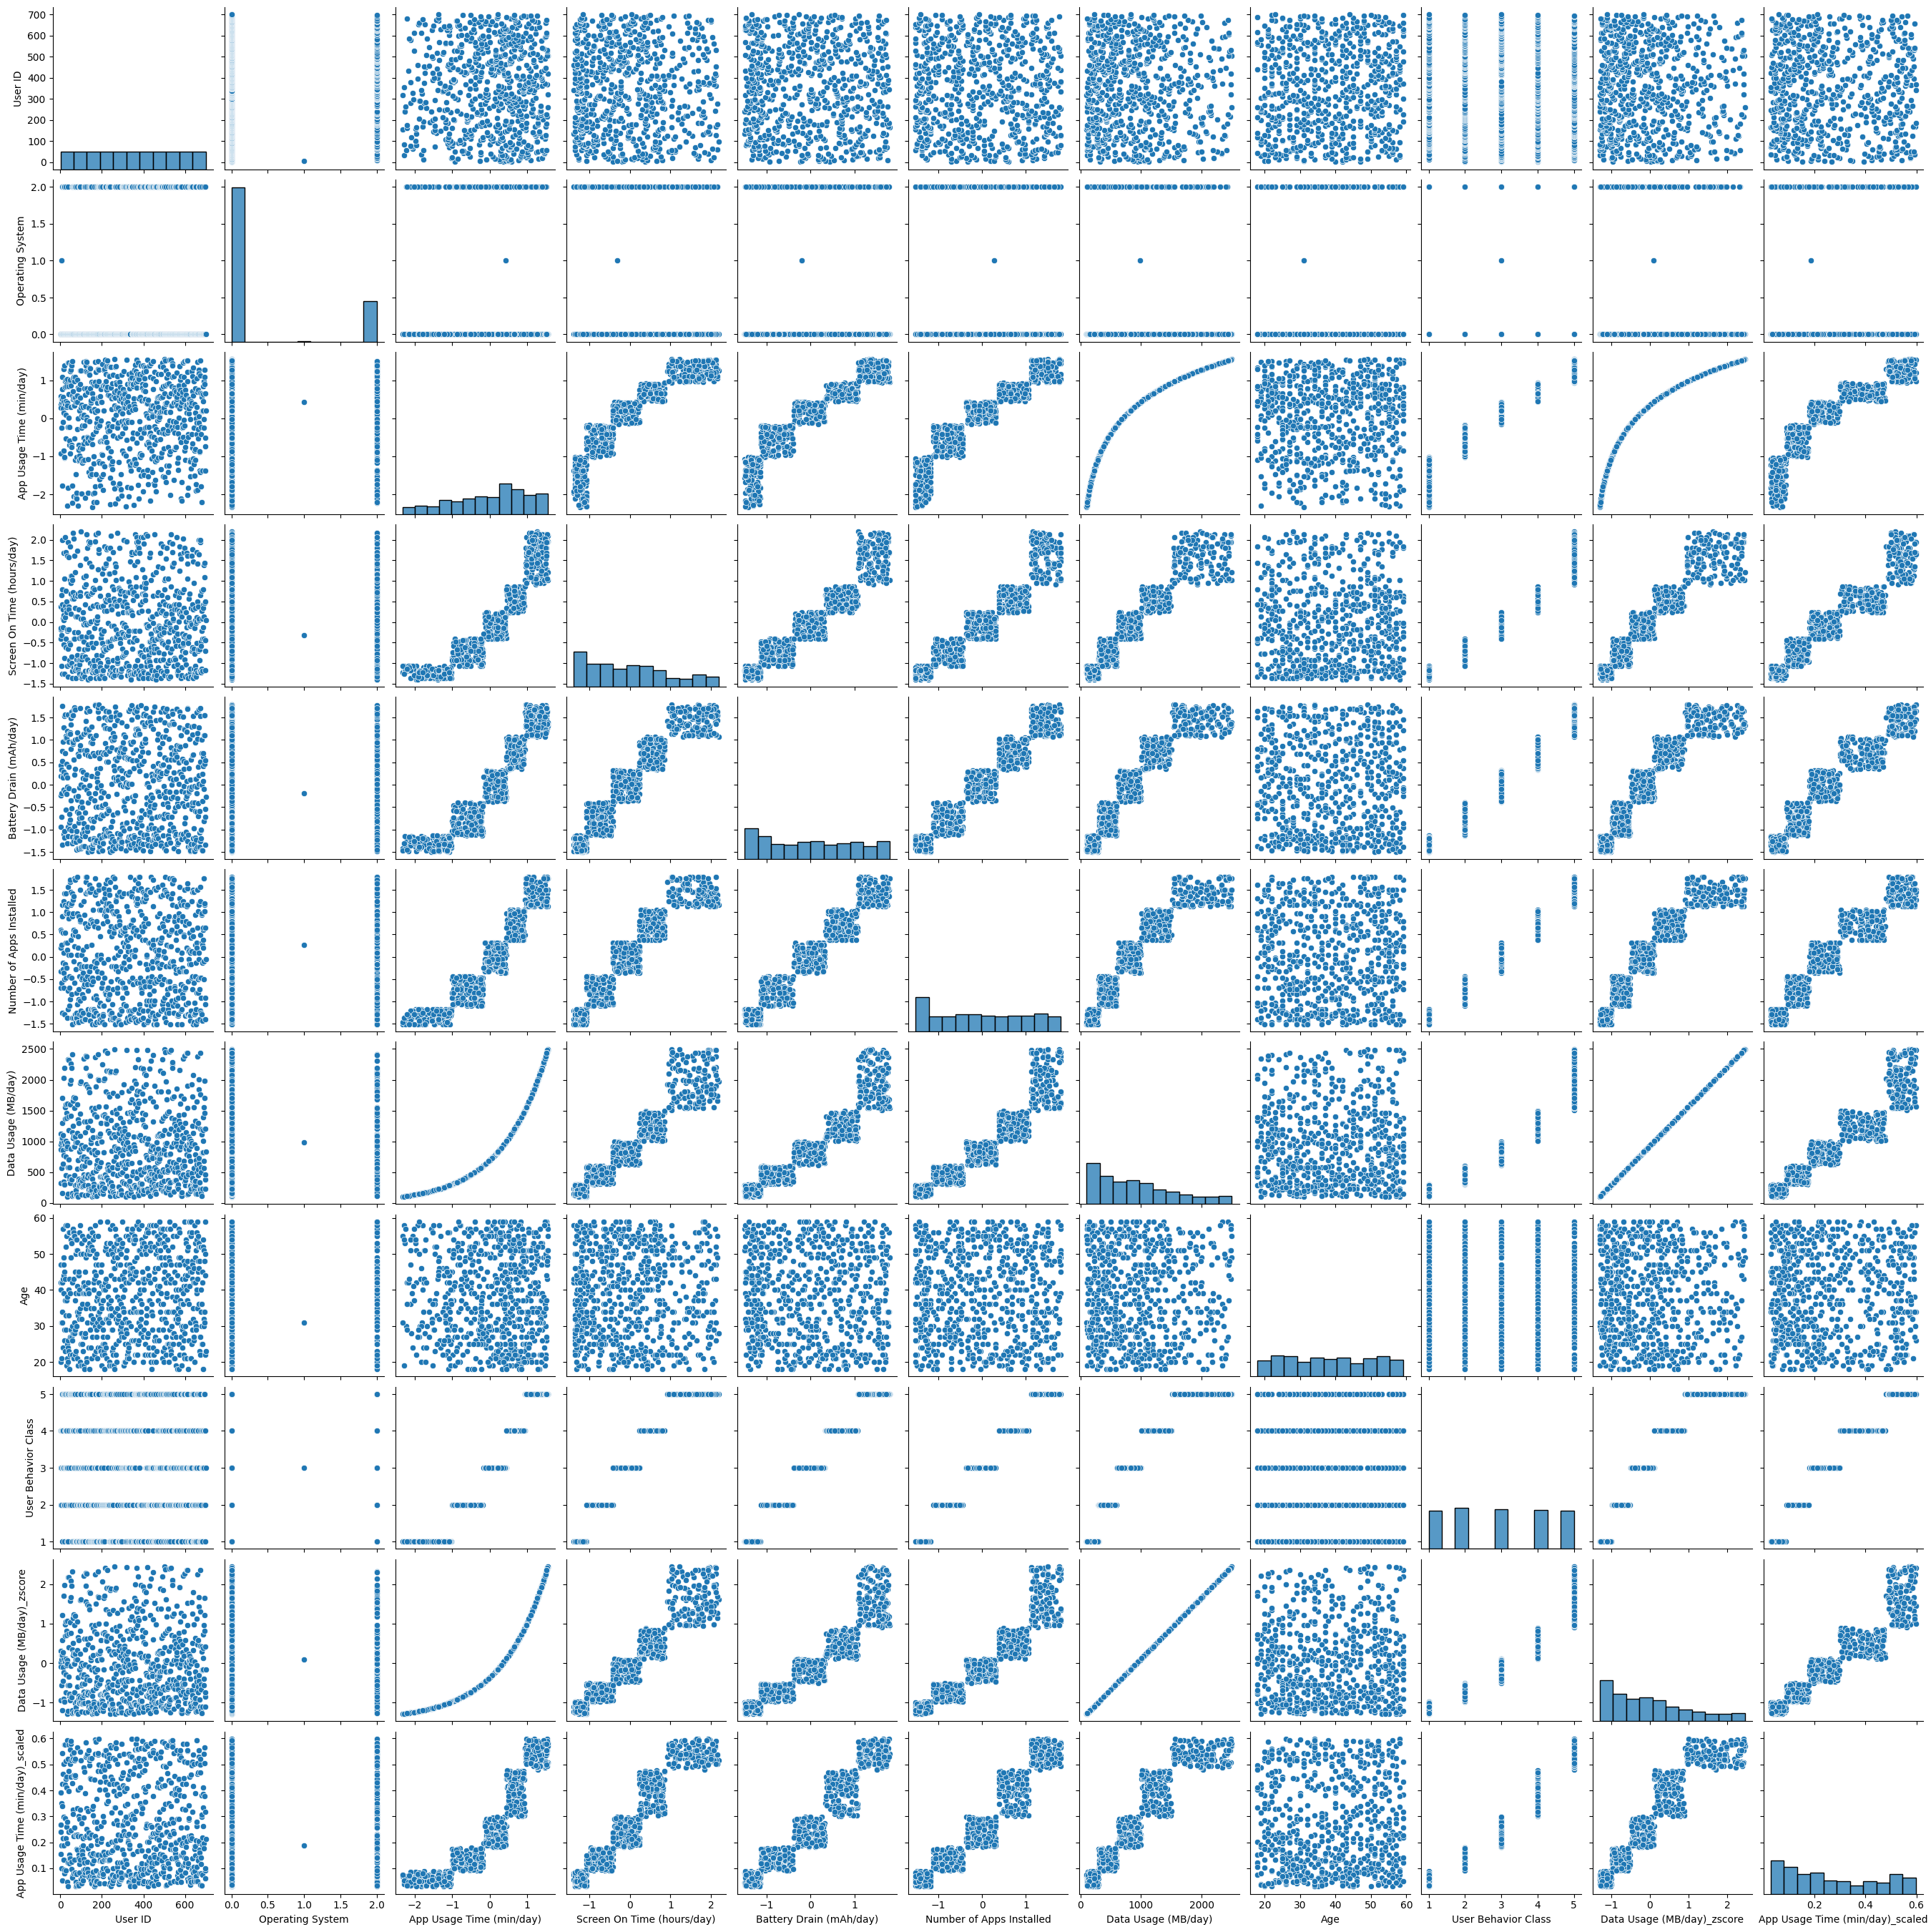

In [191]:
# BIVARIATE ANALYSIS

# numerical numerical

g = sns.pairplot(df)

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


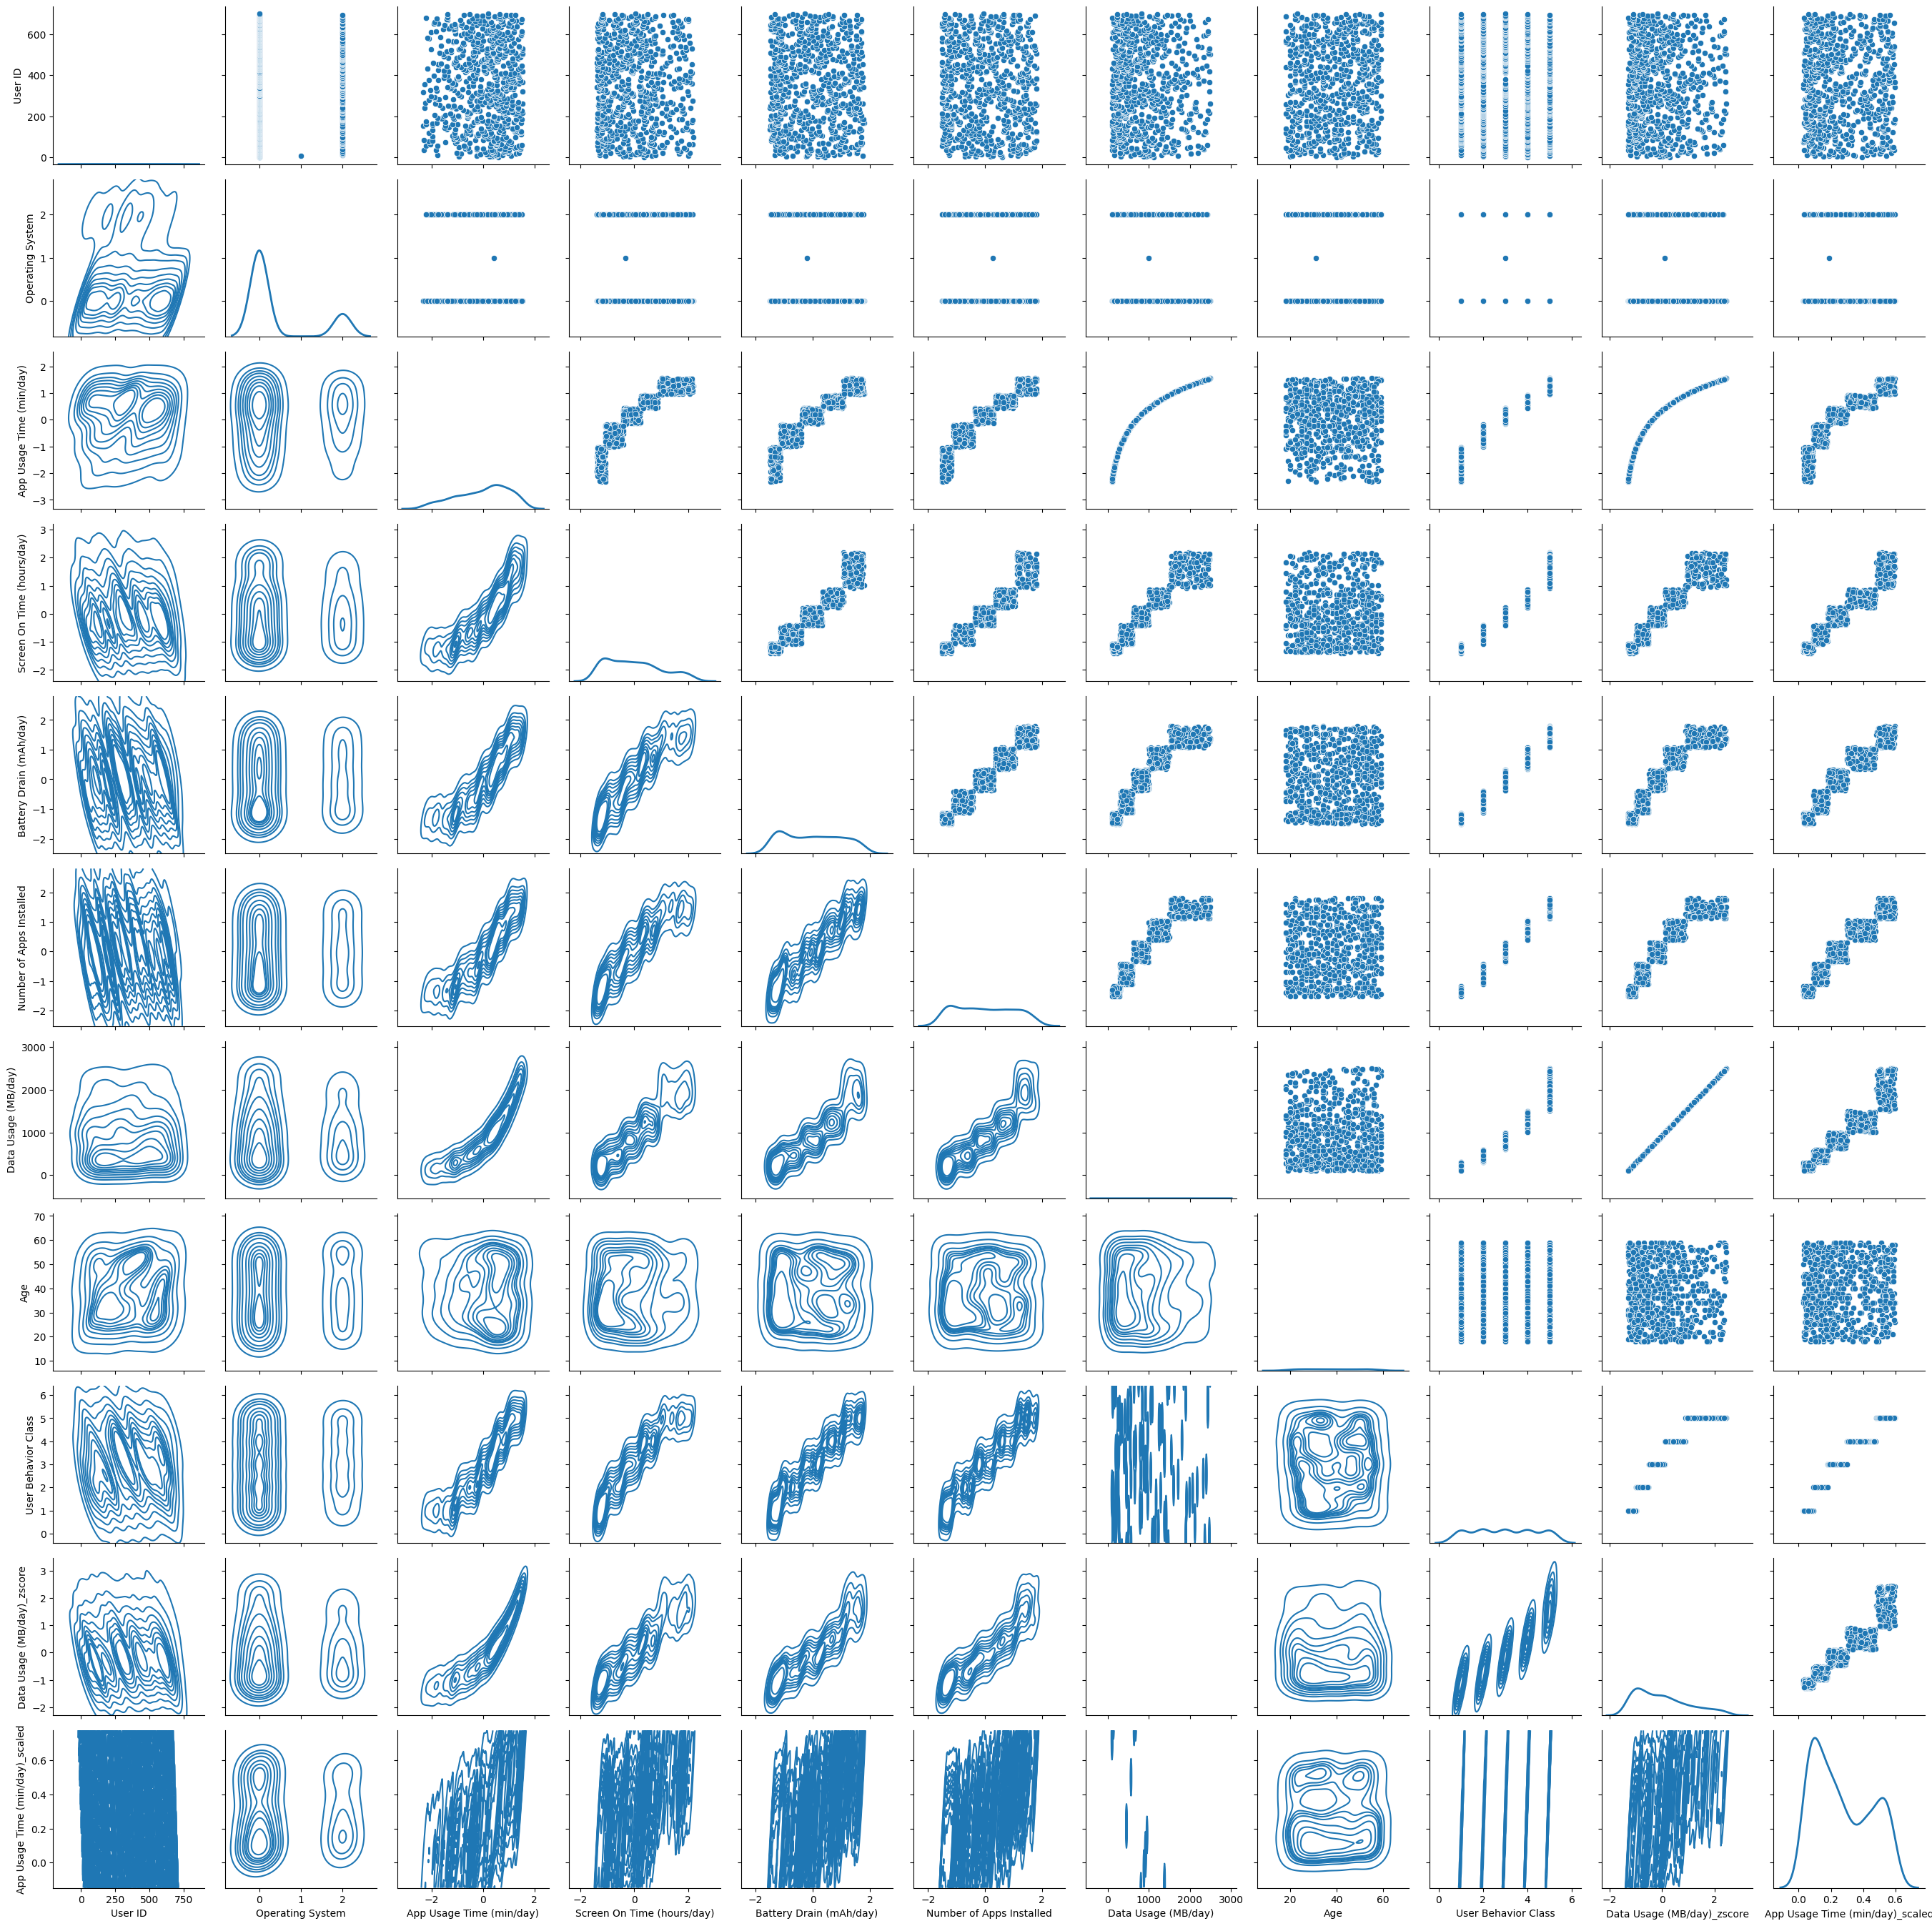

In [192]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)